In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Exploring Data (Visualization)

In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


## Histogram and KDE

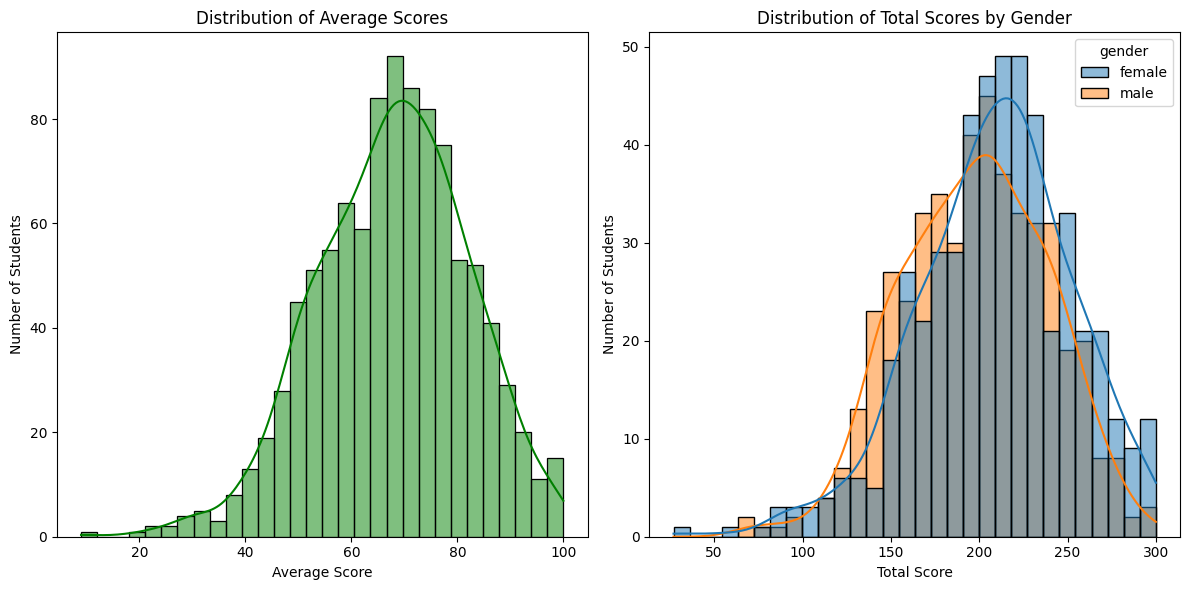

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='green')
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='blue', hue='gender')
plt.title("Distribution of Total Scores by Gender")
plt.xlabel("Total Score")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

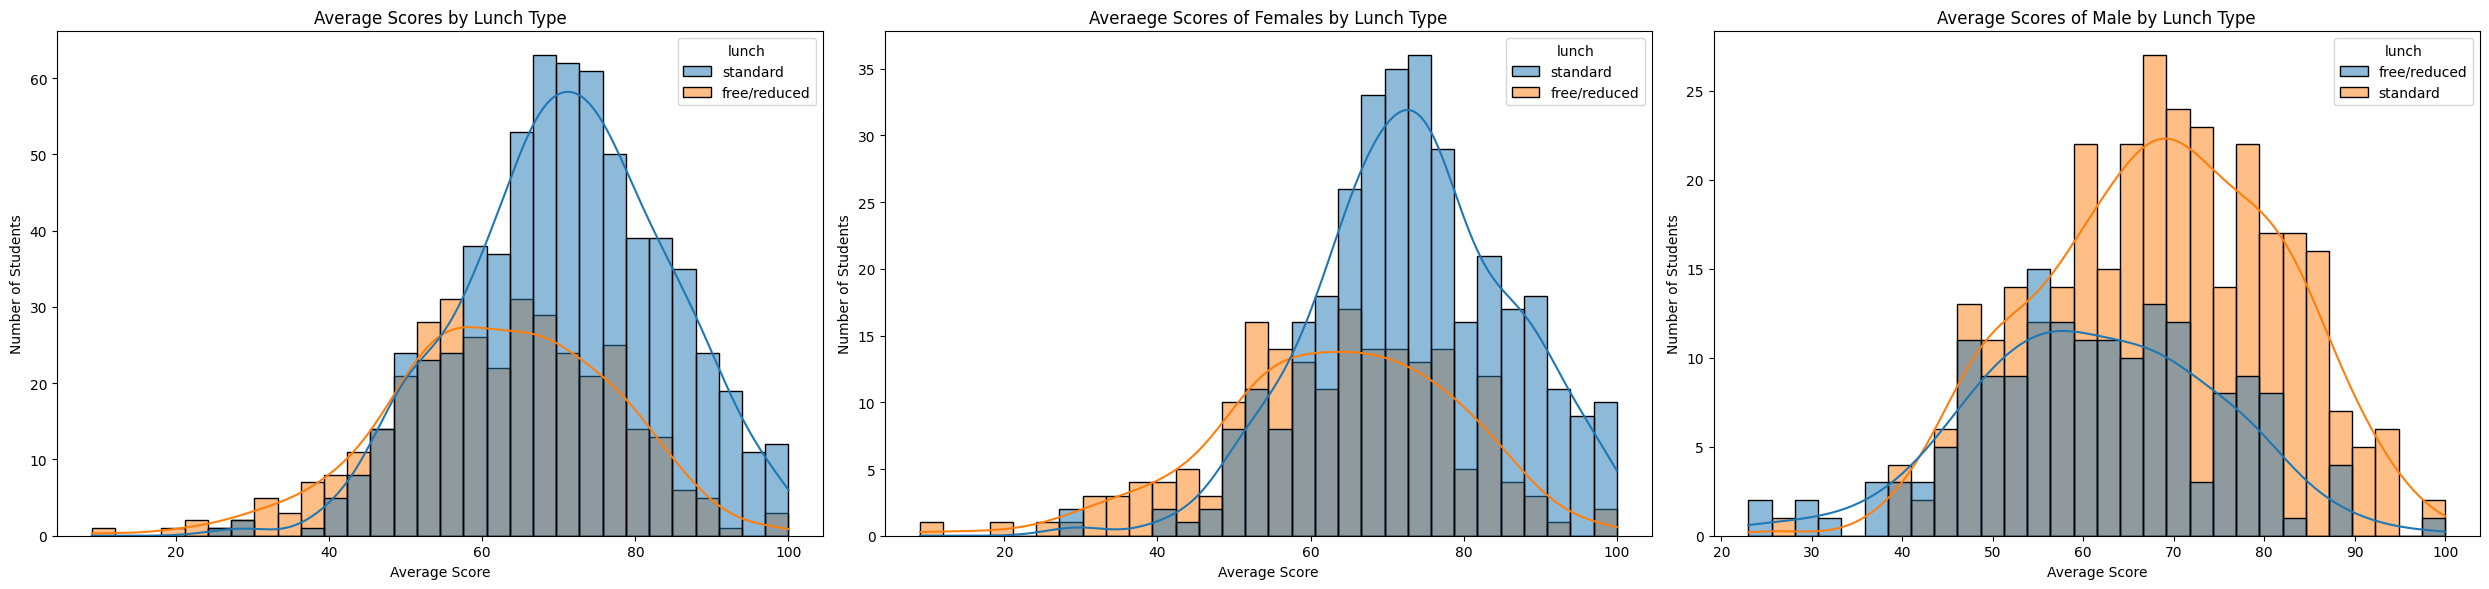

In [17]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='purple', hue='lunch')
plt.title("Average Scores by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender == "female"], x='average_score', bins=30, kde=True, color='pink', hue='lunch')
plt.title("Averaege Scores of Females by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender == "male"], x='average_score', bins=30, kde=True, color='cyan', hue='lunch')
plt.title("Average Scores of Male by Lunch Type")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

## Parental Level of Education

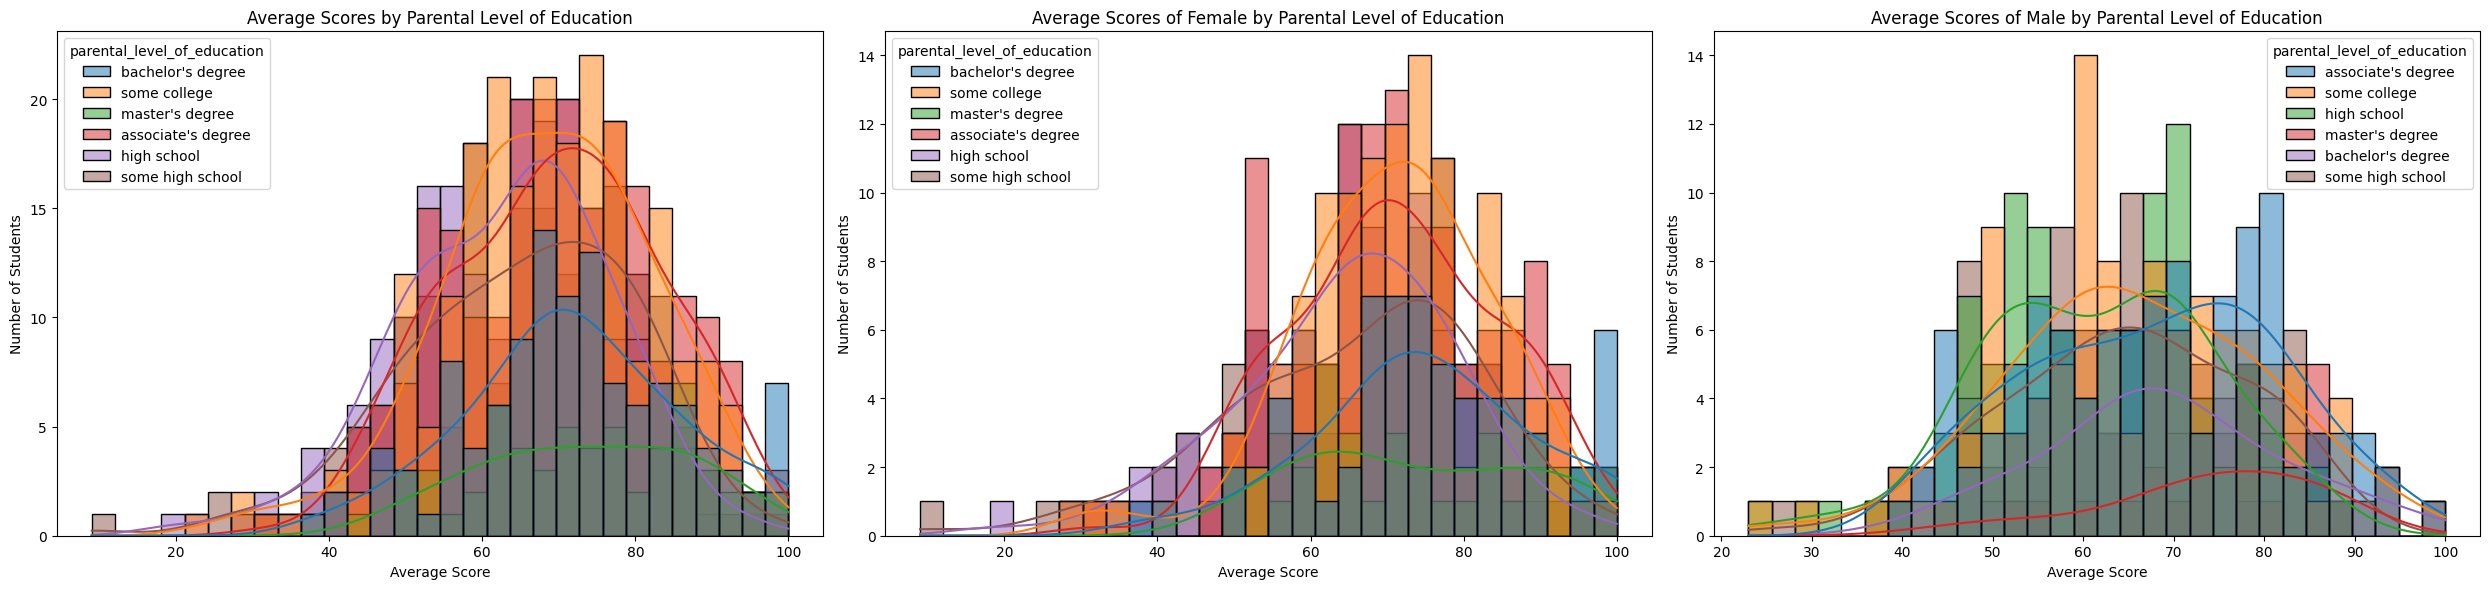

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='orange', hue='parental_level_of_education')
plt.title("Average Scores by Parental Level of Education")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

plt.subplot(1,3,2)
sns.histplot(data=df[df.gender == "female"], x='average_score', bins=30, kde=True, color='red', hue='parental_level_of_education')
plt.title("Average Scores of Female by Parental Level of Education")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

plt.subplot(1,3,3)
sns.histplot(data=df[df.gender == "male"], x='average_score', bins=30, kde=True, color='blue', hue='parental_level_of_education')
plt.title("Average Scores of Male by Parental Level of Education")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.tight_layout()

## Maximum score of students in all three subjects

In [19]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


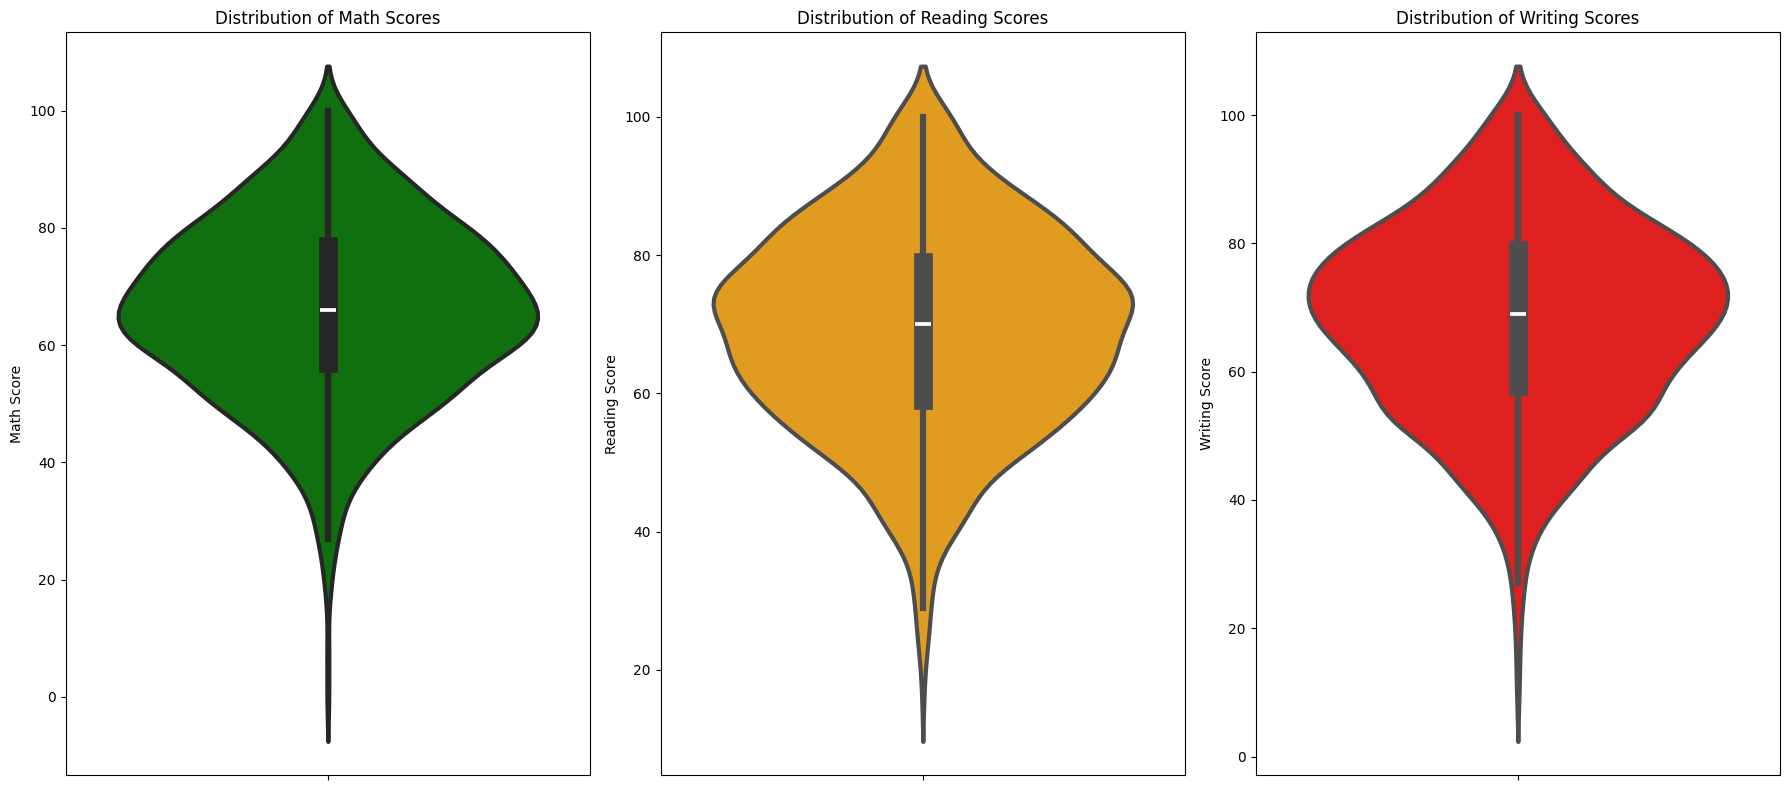

In [20]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df, y ='math_score',linewidth=3, color='green')
plt.title("Distribution of Math Scores")
plt.ylabel("Math Score")
plt.tight_layout()

plt.subplot(1,3,2)
sns.violinplot(data=df, y='reading_score', linewidth=3, color='orange')
plt.title("Distribution of Reading Scores")
plt.ylabel("Reading Score")
plt.tight_layout()

plt.subplot(1,3,3)
sns.violinplot(data=df, y='writing_score', linewidth=3, color='red')
plt.title("Distribution of Writing Scores")
plt.ylabel("Writing Score")
plt.tight_layout()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

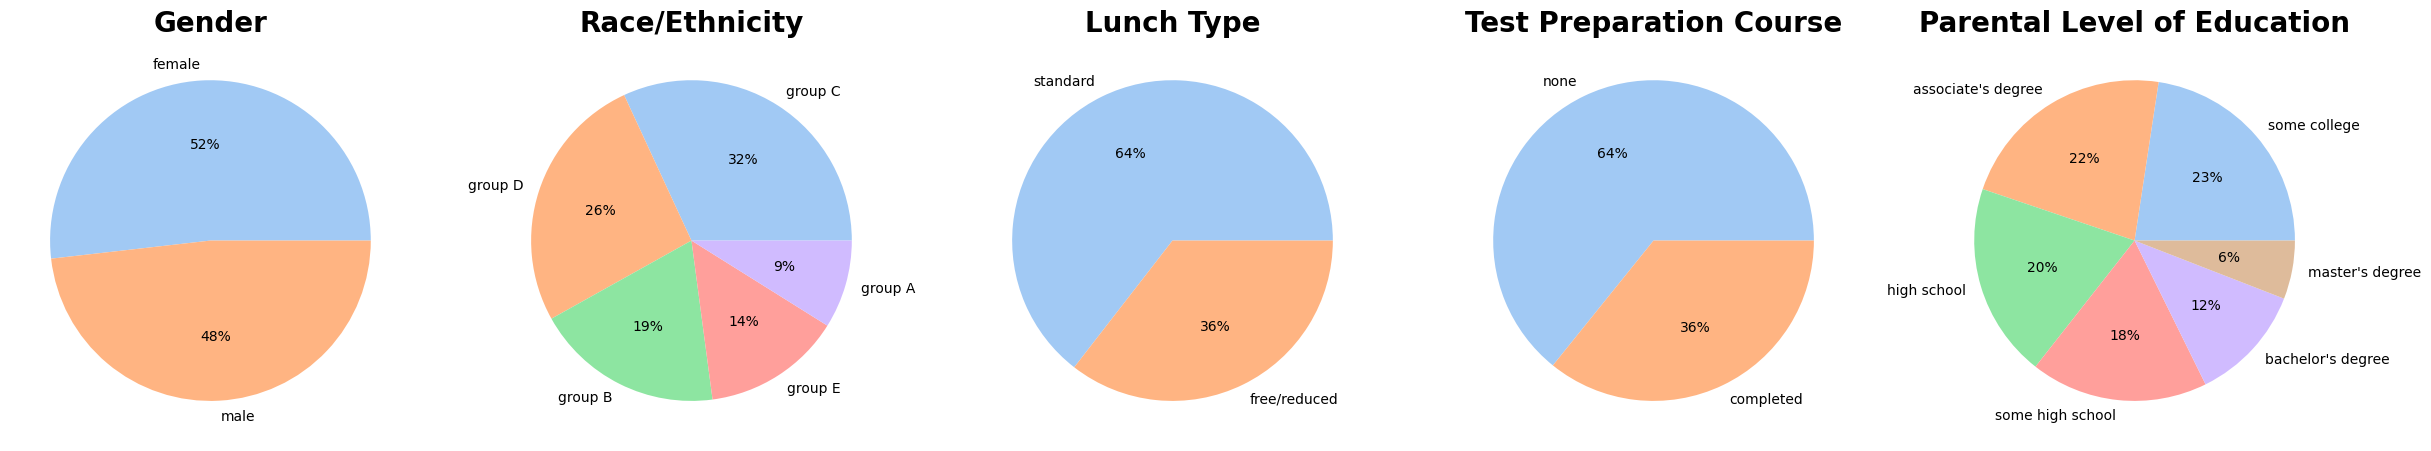

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = size.index.tolist()
color = sns.color_palette('pastel')[0:2]

plt.pie(size, colors = color, labels =labels, autopct= "%1.0f%%")
plt.title("Gender", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.axis('off')



plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = size.index.tolist()
color = sns.color_palette('pastel')[0:5]

plt.pie(size, colors = color,labels = labels,autopct = '%1.0f%%')
plt.title('Race/Ethnicity', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.axis('off')



plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = size.index.tolist()
color = sns.color_palette('pastel')[0:2]

plt.pie(size, colors = color, labels= labels, autopct= "%1.0f%%")
plt.title("Lunch Type", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.axis("off")



plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = size.index.tolist()
color = sns.color_palette('pastel')[0:2]

plt.pie(size, colors = color, labels = labels, autopct= "%1.0f%%")
plt.title("Test Preparation Course", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.axis("off")


plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = size.index.tolist()
color = sns.color_palette('pastel')[0:6]

plt.pie(size, colors = color, labels = labels, autopct='%1.0f%%')
plt.title("Parental Level of Education", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.axis("off")

## Gender Column

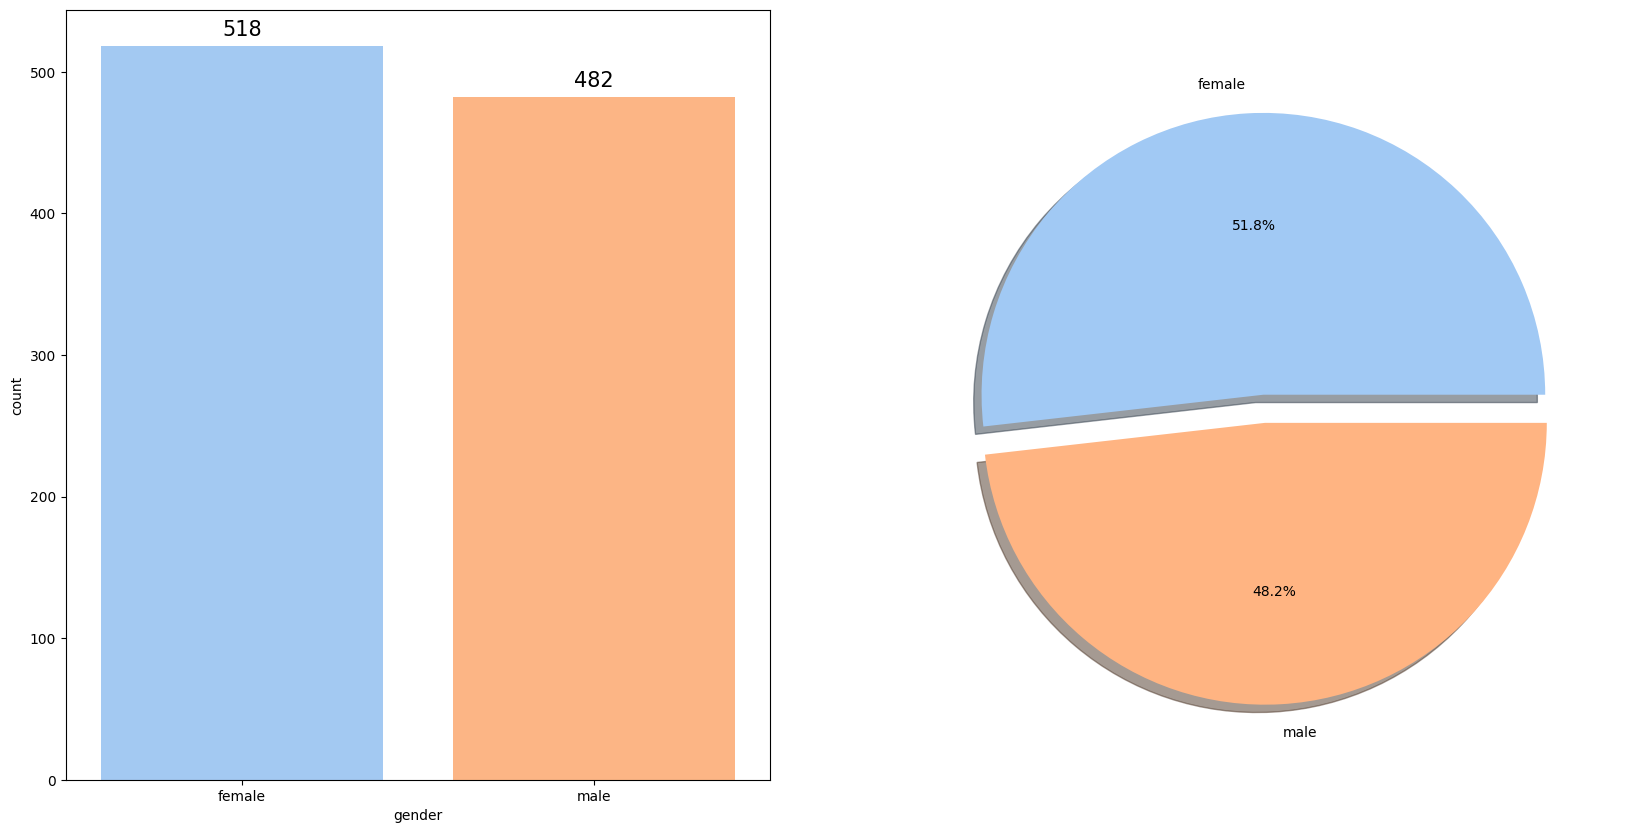

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x=df['gender'], palette='pastel', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%1.0f', label_type='edge', padding=5, fontsize=15, color='black')

ax[1].pie(x = df['gender'].value_counts().to_list(), labels = df['gender'].value_counts().index.to_list(),colors = sns.color_palette('pastel')[0:2], explode=[0.0,0.1], autopct="%1.1f%%", shadow=True)
plt.show()

In [23]:
df.gender.value_counts().index.to_list()

['female', 'male']

## Is gender has any impact on student performance ??

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


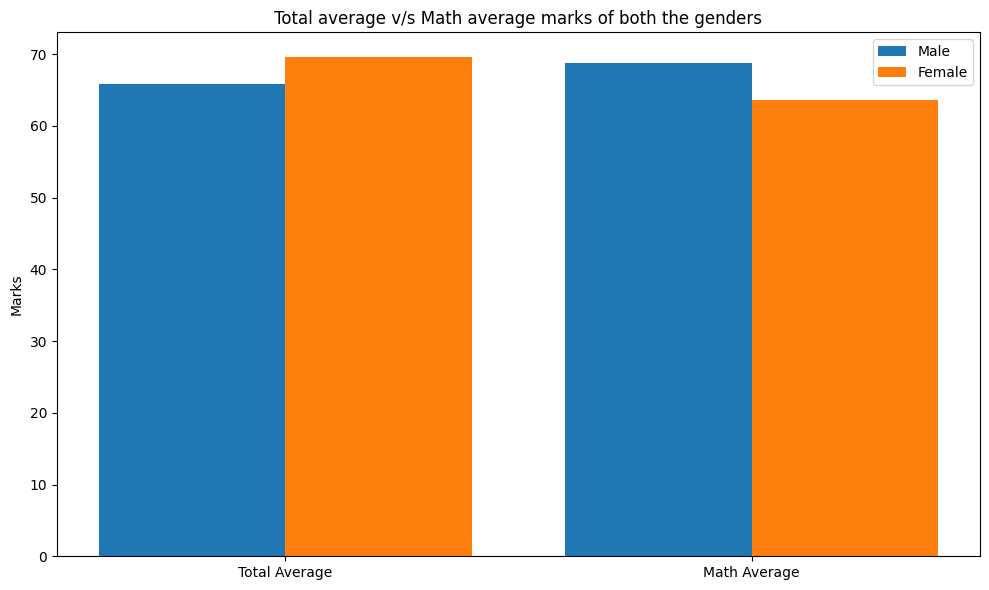

In [57]:
plt.figure(figsize=(10,6))

X = ['Total Average', 'Math Average']

female_score = [df.groupby('gender')['average_score'].mean()[0], df.groupby('gender')['math_score'].mean()[0]]
male_score = [df.groupby('gender')['average_score'].mean()[1], df.groupby('gender')['math_score'].mean()[1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders")
plt.legend()
plt.tight_layout()
plt.show()

## Race/Ethinicity

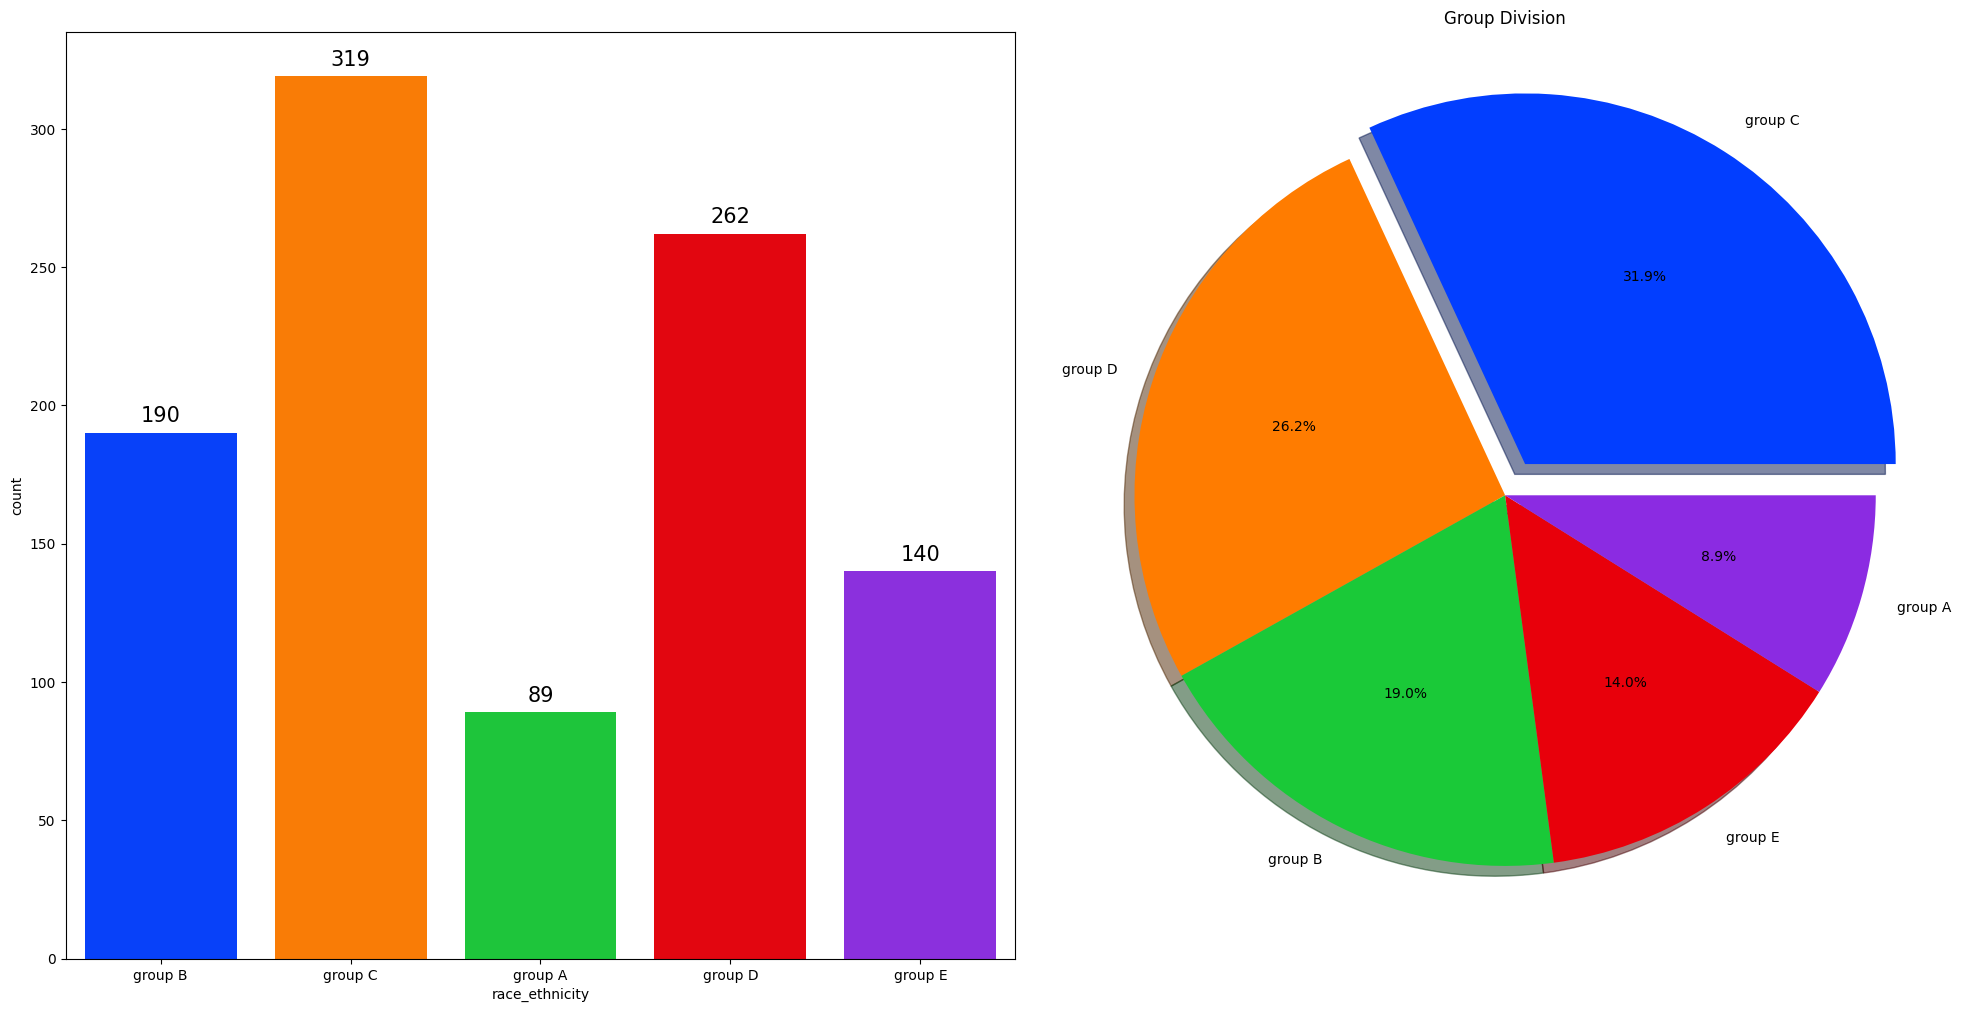

In [43]:
fig, axs =plt.subplots(1,2, figsize=(20,10))
sns.countplot(data=df, x = df['race_ethnicity'], palette='bright', ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%1.0f', label_type='edge', padding=5, fontsize=15, color='black')

plt.pie(x = df['race_ethnicity'].value_counts(), labels = df['race_ethnicity'].value_counts().index.to_list(), explode=[0.1, 0.0, 0.0, 0.0, 0.0], autopct="%1.1f%%", colors=sns.color_palette('bright')[0:5], shadow=True)
plt.title("Group Division")
plt.tight_layout()
plt.show()

## Is Race/Ethinicity has any impact on student performance ??

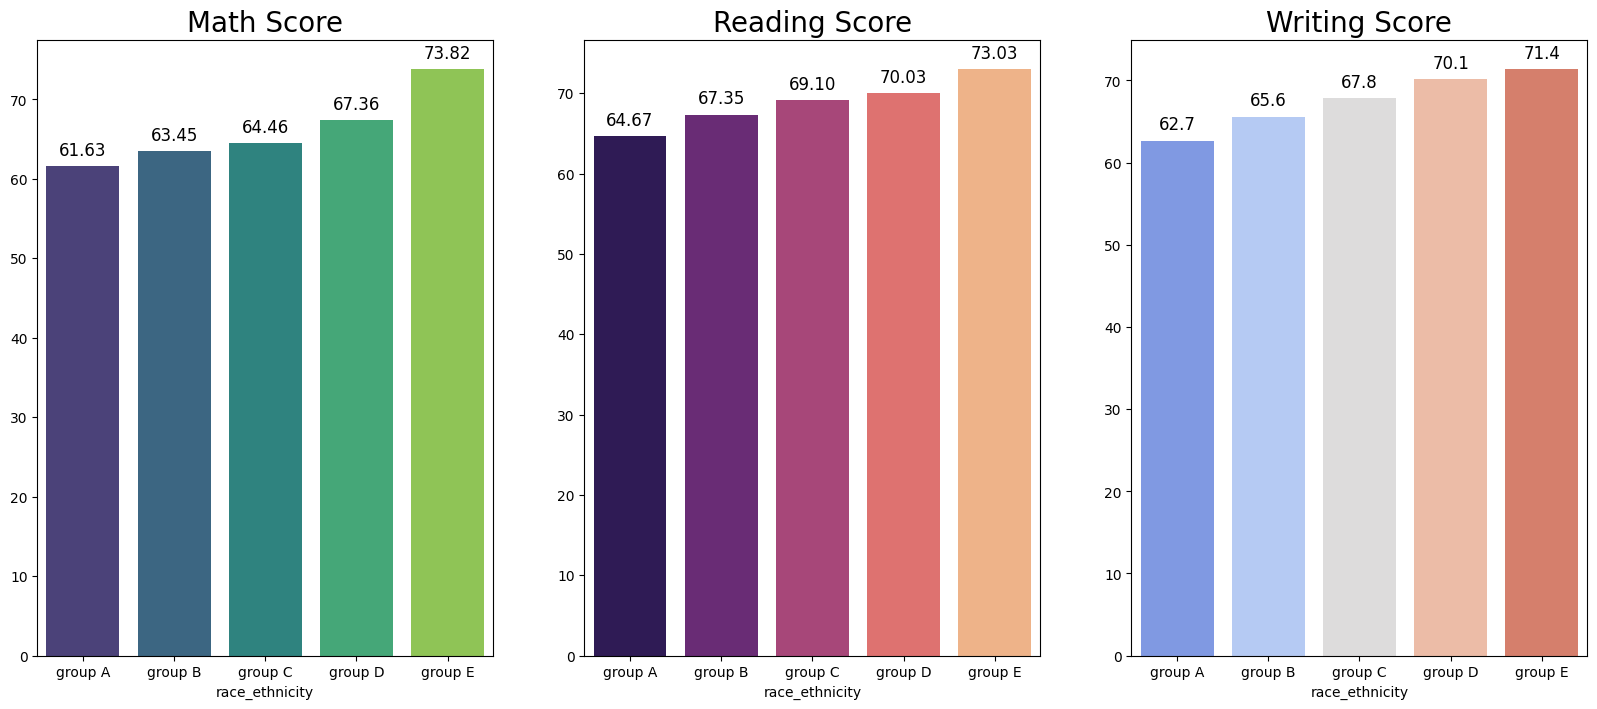

In [67]:
fig, axs = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=df.groupby('race_ethnicity')['math_score'].mean().index, y = df.groupby('race_ethnicity')['math_score'].mean().values, ax=axs[0], palette='viridis')
axs[0].set_title("Math Score", color='black', size=20 )
for container in axs[0].containers:
    axs[0].bar_label(container, fmt="%1.2f", label_type='edge', padding=5, fontsize=12, color='black')

sns.barplot(x=df.groupby('race_ethnicity')['reading_score'].mean().index, y=df.groupby('race_ethnicity')['reading_score'].mean().values, ax=axs[1], palette='magma')
axs[1].set_title("Reading Score", color='black', size=20)
for container in axs[1].containers:
    axs[1].bar_label(container, fmt="%1.2f", label_type='edge', padding=5, fontsize=12, color='black')

sns.barplot(x=df.groupby('race_ethnicity')['writing_score'].mean().index, y=df.groupby('race_ethnicity')['writing_score'].mean().values, ax=axs[2], palette='coolwarm')
axs[2].set_title("Writing Score", color="black", size=20)
for container in axs[2].containers:
    axs[2].bar_label(container, fmt="%1.1f", label_type='edge', padding=5, fontsize=12, color='black')

## Parental level of education column

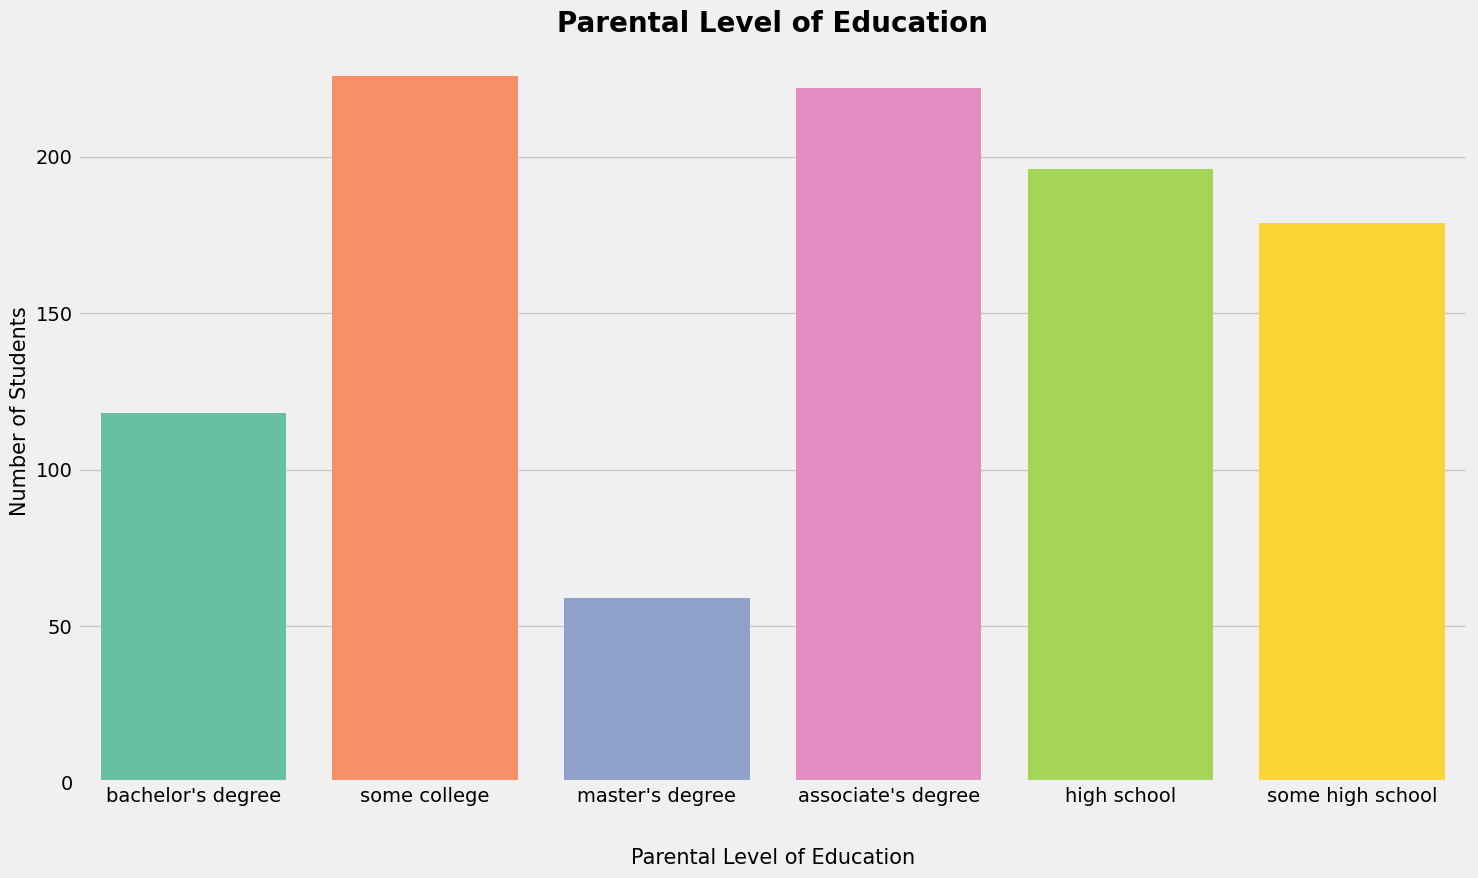

In [75]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data=df, x=df['parental_level_of_education'], palette='Set2', saturation=0.95)
plt.title("Parental Level of Education", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel("Parental Level of Education", fontsize=15, labelpad=30)
plt.ylabel("Number of Students", fontsize=15)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

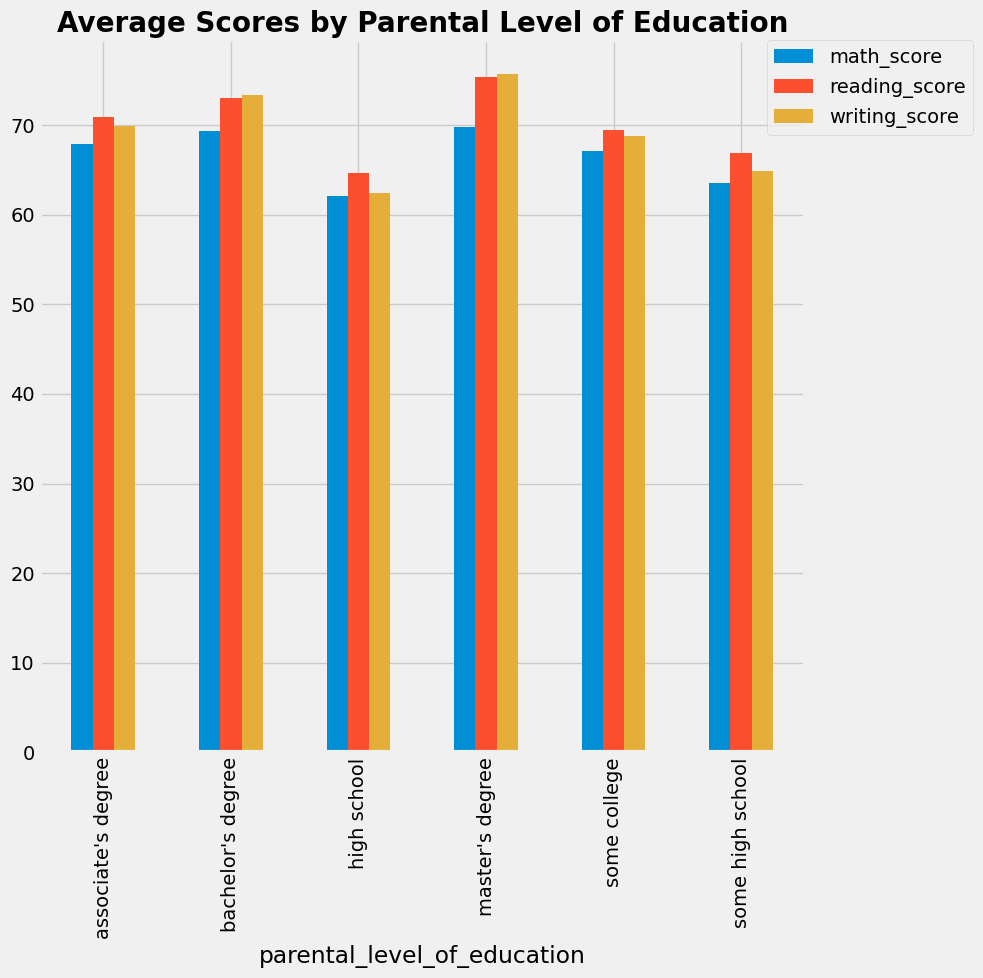

In [87]:
df.groupby('parental_level_of_education').agg({'math_score':'mean', 'reading_score':'mean', 'writing_score': 'mean'}).plot(kind='bar', figsize=(10, 10))
plt.title("Average Scores by Parental Level of Education", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

## Lunch Column

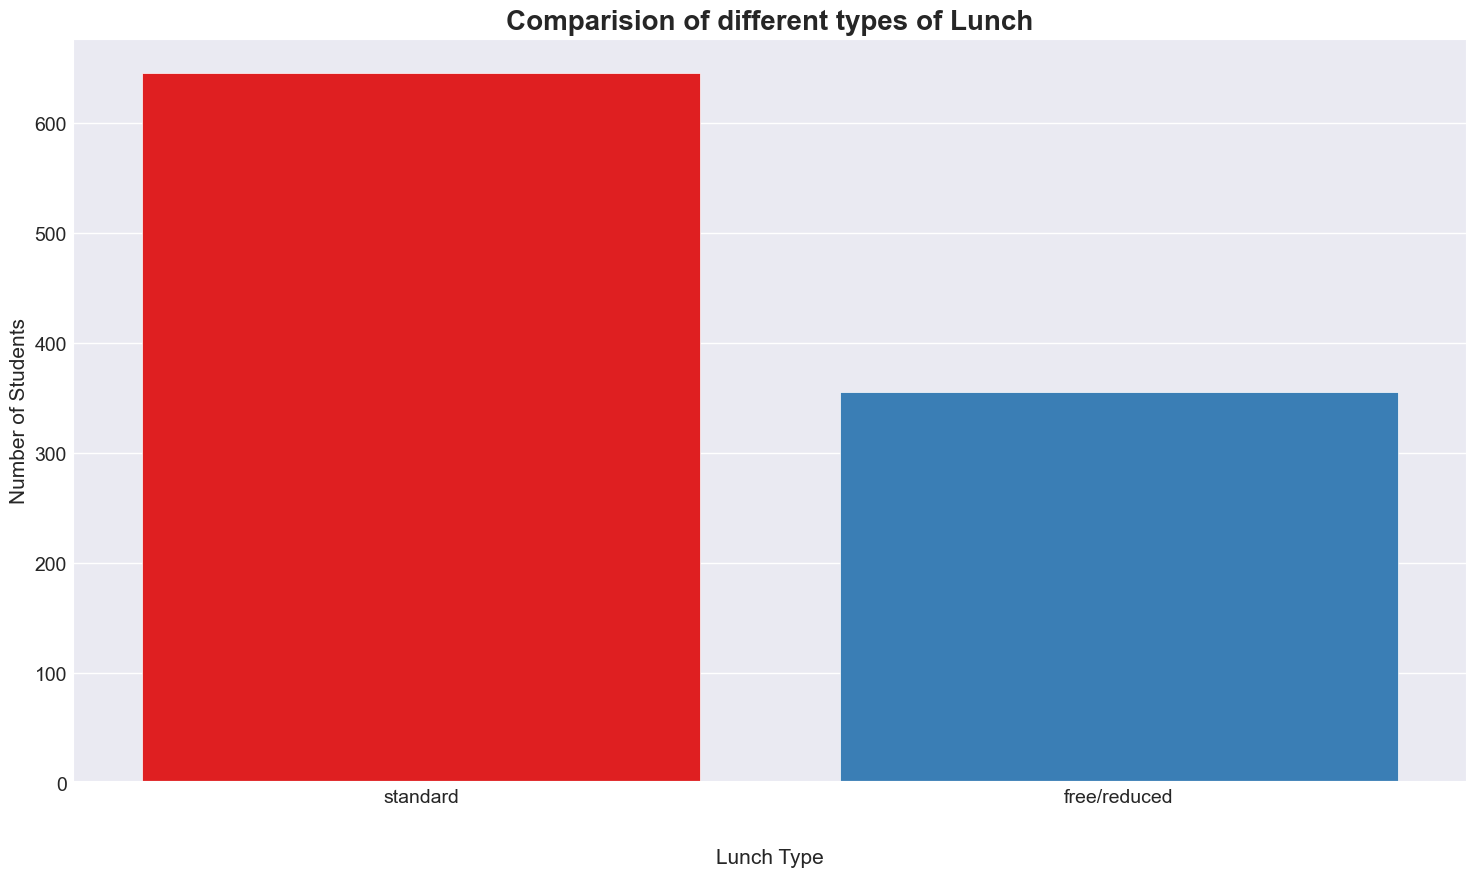

In [93]:
plt.rcParams['figure.figsize'] = (15,9)
sns.set_style('darkgrid')
sns.countplot(data=df, x=df['lunch'], palette="Set1", saturation=0.95)
plt.title("Comparision of different types of Lunch", fontdict={'fontsize': 20, 'fontweight':'bold'})
plt.xlabel("Lunch Type", fontsize=15, labelpad=30)
plt.ylabel("Number of Students", fontsize=15)
plt.tight_layout()
plt.show()

## Is lunch type intake has any impact on student's performance ??

In [ ]:
plt.subplots(1,3,figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(data=df, x='lunch', y='math_score', hue='test')

In [ ]:
plt.subplots(1,3,figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot(data=df, x='test_preparation_course', y='math_score', hue='test')

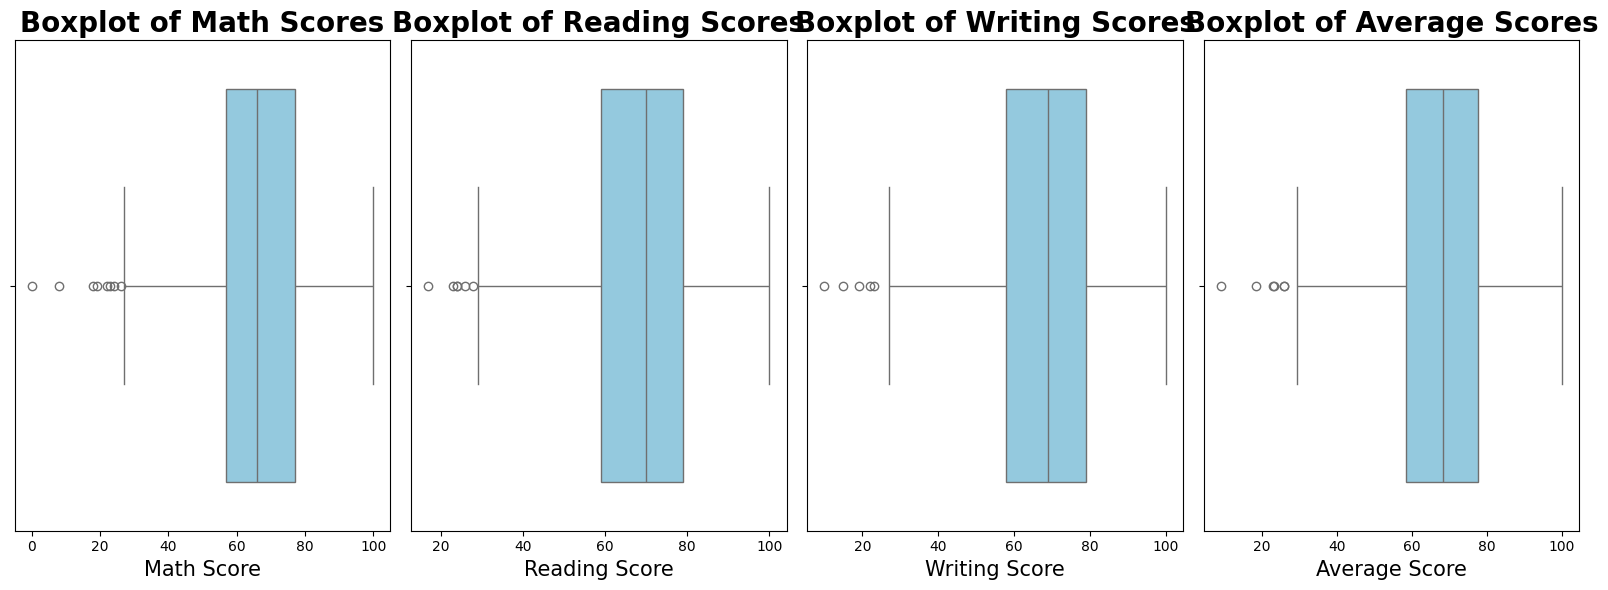

In [113]:
plt.subplots(1,4,figsize=(16,6))
plt.subplot(1,4,1)
sns.boxplot(data=df, x='math_score', color='skyblue')
plt.title("Boxplot of Math Scores", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel("Math Score", fontsize=15)

plt.subplot(1,4,2)
sns.boxplot(data=df, x='reading_score', color='skyblue')
plt.title("Boxplot of Reading Scores", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel("Reading Score", fontsize=15)

plt.subplot(1,4,3)
sns.boxplot(data=df, x='writing_score', color='skyblue')
plt.title("Boxplot of Writing Scores", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel("Writing Score", fontsize=15)

plt.subplot(1,4,4)
sns.boxplot(data=df, x='average_score', color='skyblue')
plt.title("Boxplot of Average Scores", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel("Average Score", fontsize=15)

plt.tight_layout()
plt.show()

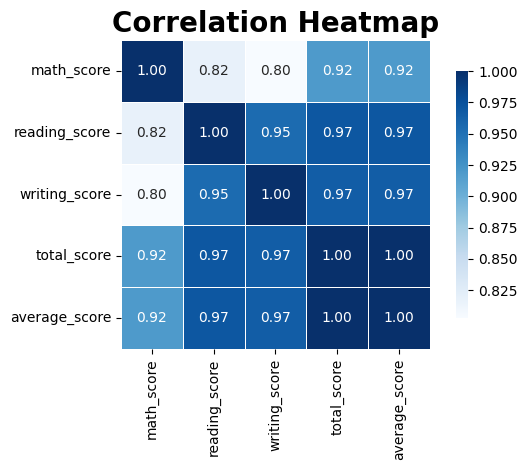

In [118]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.tight_layout()
plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


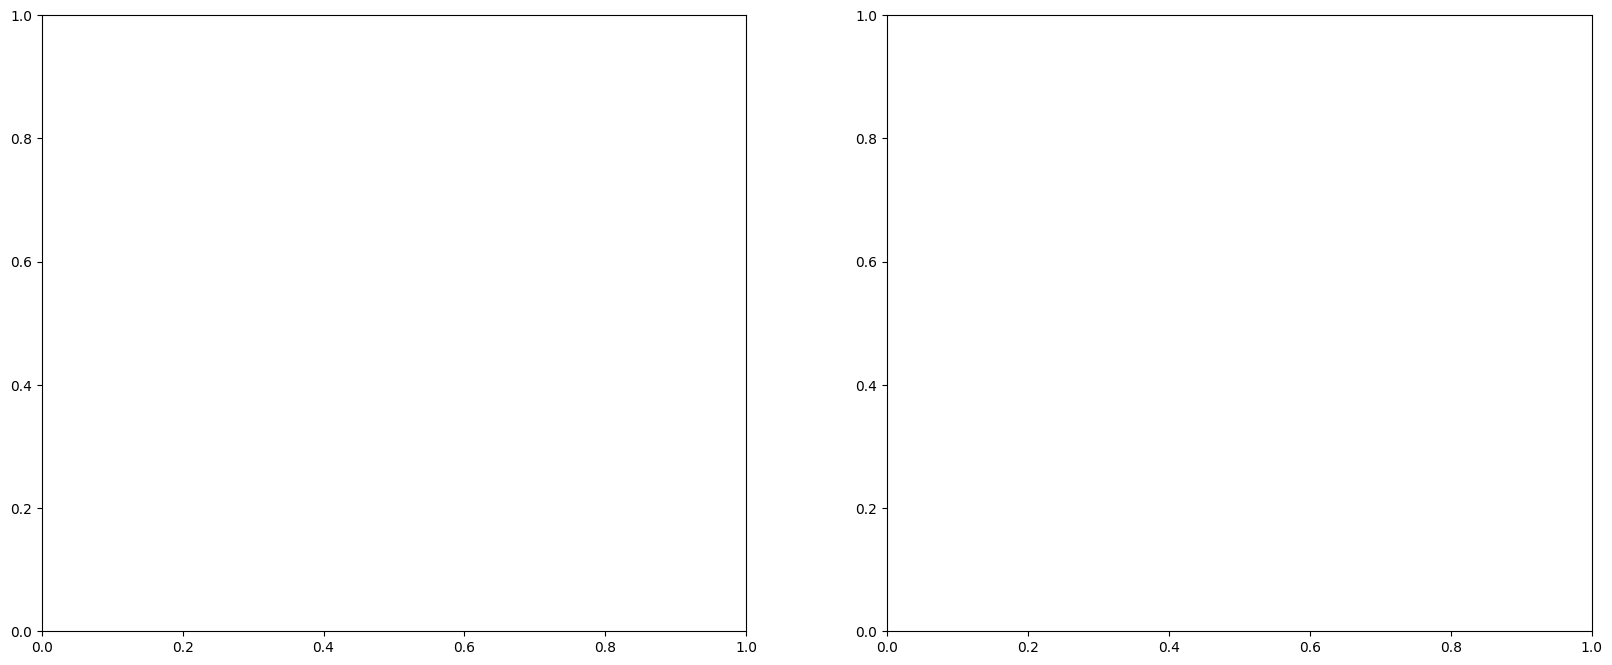

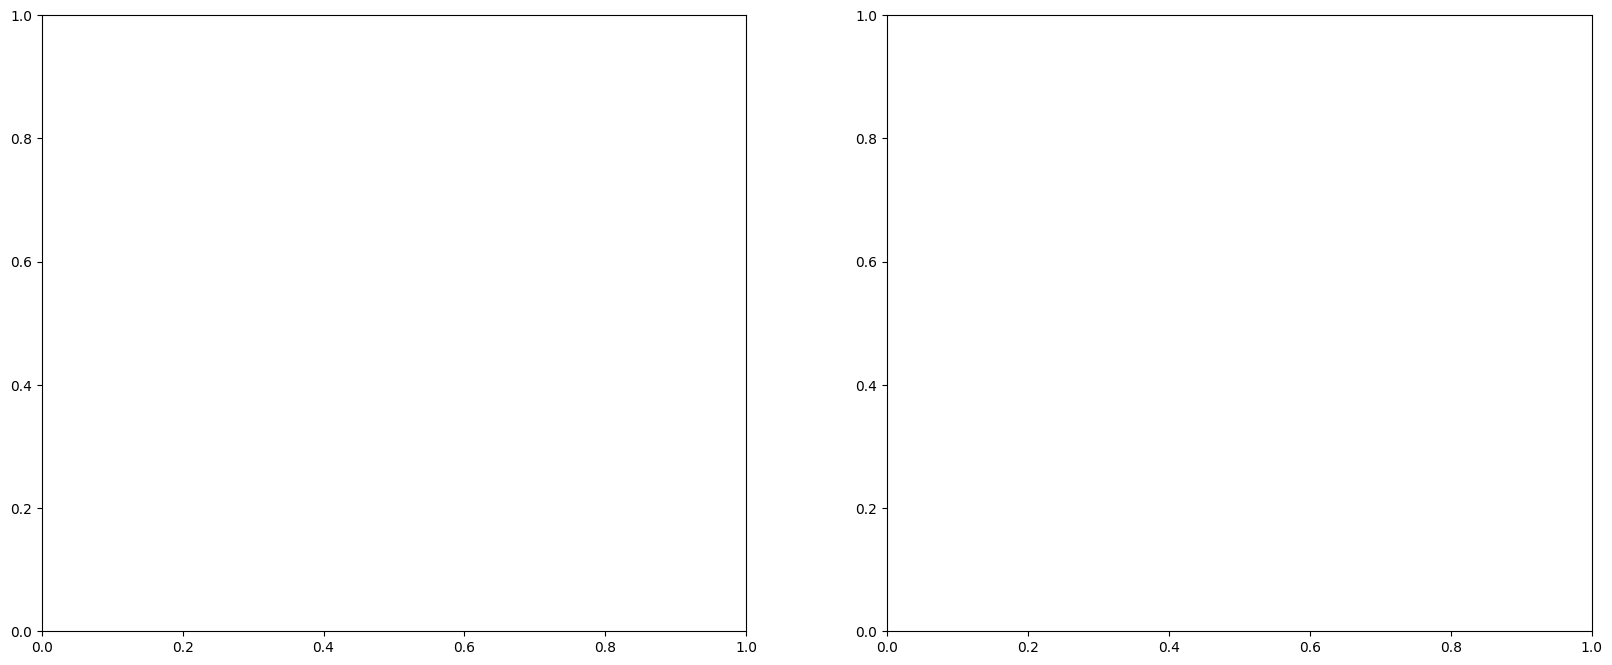

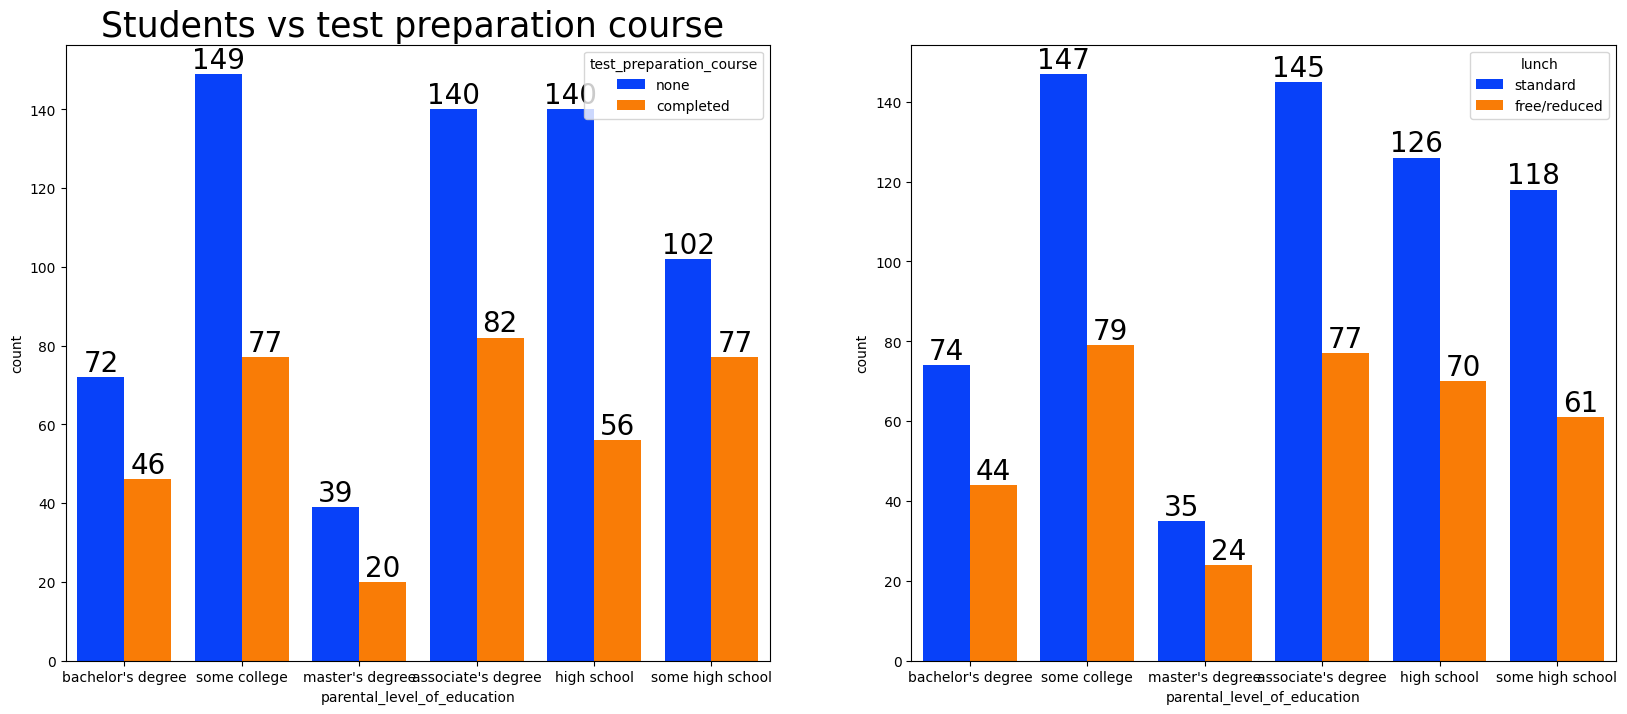

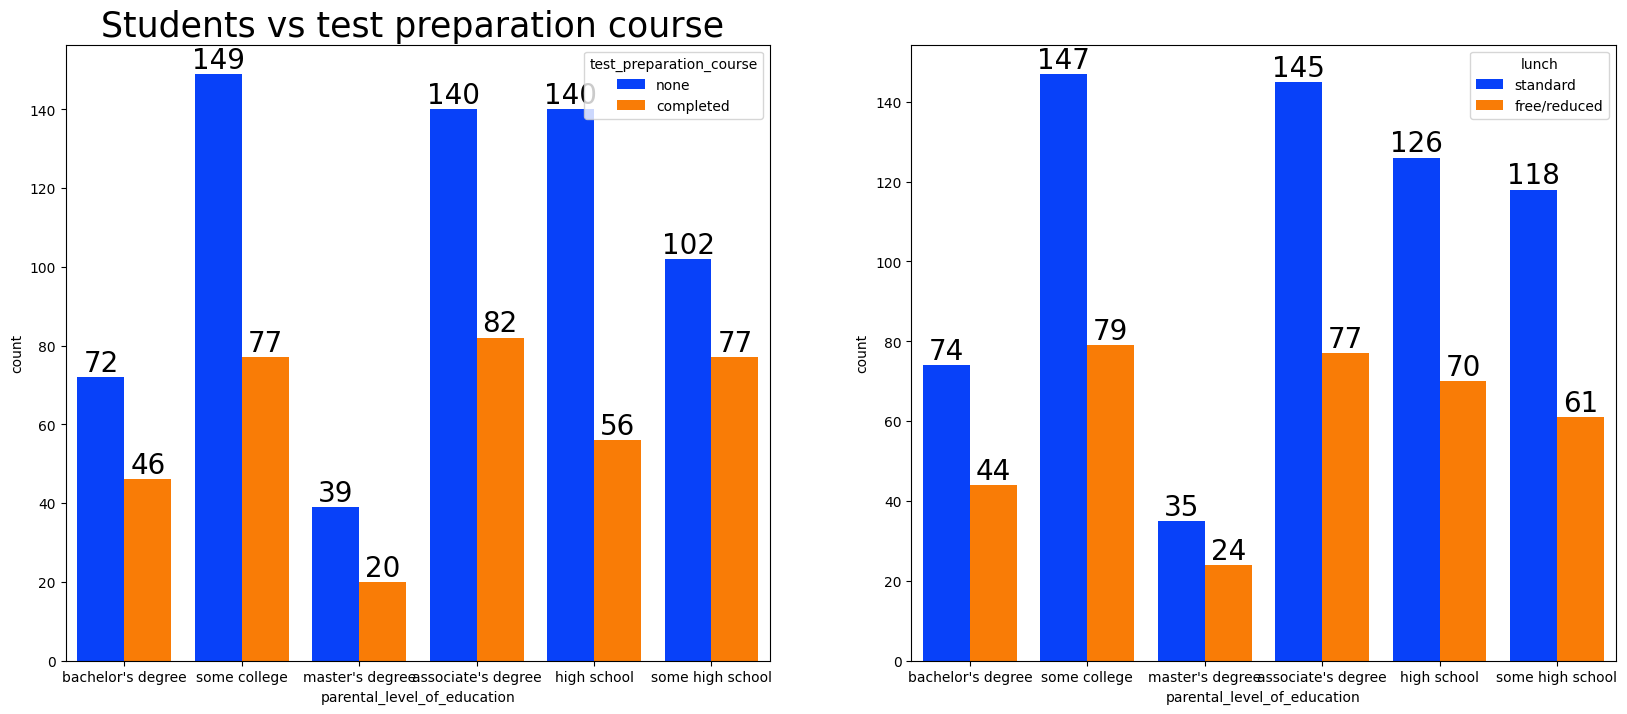

In [122]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

plt.show()

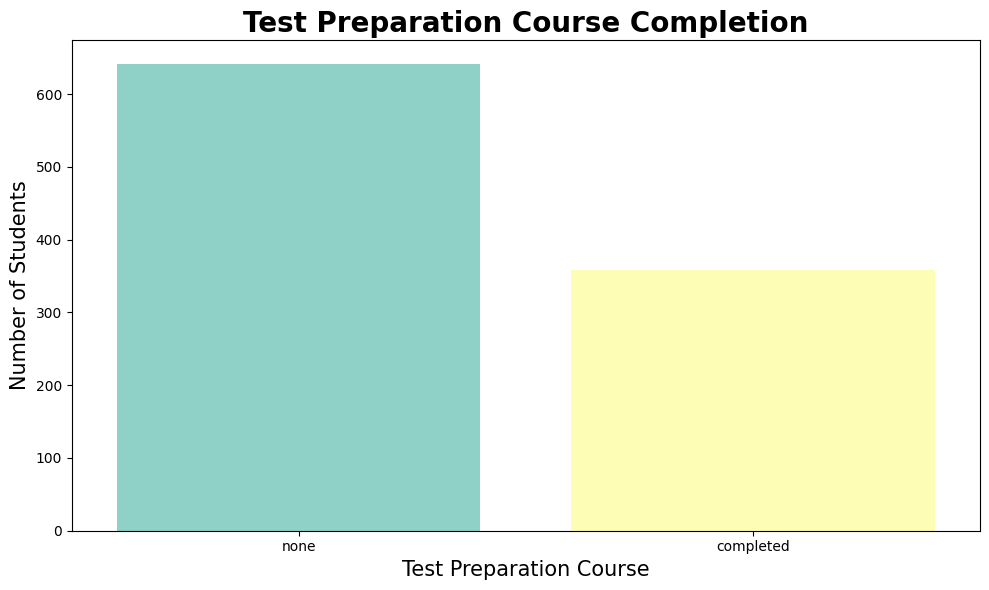

In [124]:
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(data=df, x= 'test_preparation_course', palette='Set3', saturation=0.95)
plt.title("Test Preparation Course Completion", fontdict={'fontsize':20, 'fontweight':'bold'})
plt.xlabel("Test Preparation Course", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.tight_layout()
plt.show()

## Is test preparation course intake has any impact on student performance ??

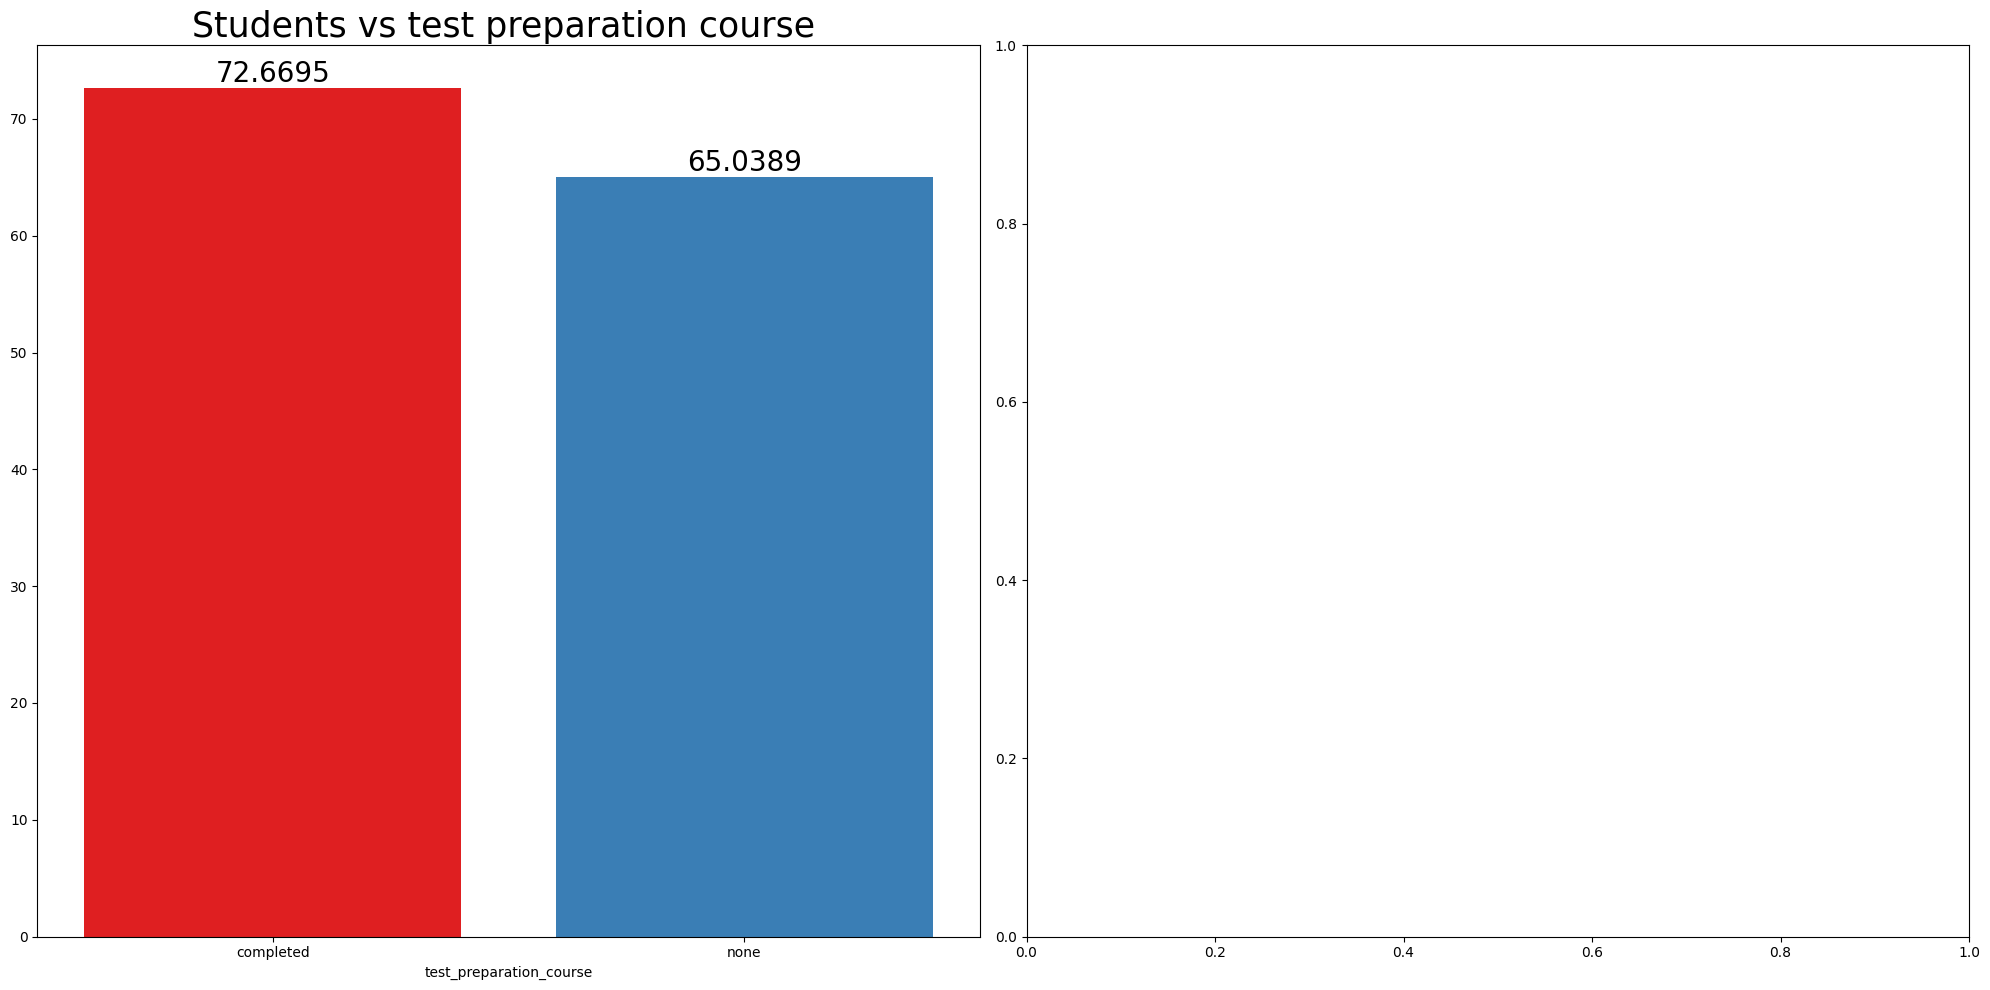

In [133]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x=df.groupby('test_preparation_course')['average_score'].mean().index, y=df.groupby('test_preparation_course')['average_score'].mean().values, palette='Set1', ax=ax[0], saturation=0.95)
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.tight_layout()
plt.show()